In [1]:
from fbprophet import Prophet

import pandas as pd
import numpy as np

from sklearn.compose import make_column_transformer,make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV

In [2]:
players = pd.read_csv("./players.csv").sort_values(by=['year'])
players.year = pd.to_datetime(players.year, format='%Y')

squads = pd.read_csv("./squads.csv")
squads.year = pd.to_datetime(squads.year, format='%Y')

In [24]:
df = players[players.name_player == "Lionel Messi"]

from multi_prophet import MultiProphet

def predict_player(history, n=5):
    model = Prophet()
    model.fit(history.rename(columns={"year": "ds", "value_player":"y"}))
    future = model.make_future_dataframe(n, freq='y', include_history=False)

    m = MultiProphet(columns=["goals", "games_played", "value_player", "minute_played"])
    m.fit(history.rename(columns={"year": "ds"}))

    return m, m.predict(future)

In [30]:
m

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/nix/store/b93zj8rgih5hl6lrymfldh043w0dm5nf-python3-3.8.13-env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:n_changepoints greater than number of observations. Using 8.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/nix/store/b93zj8rgih5hl6lrymfldh043w0dm5nf-python3-3.8.13-env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future

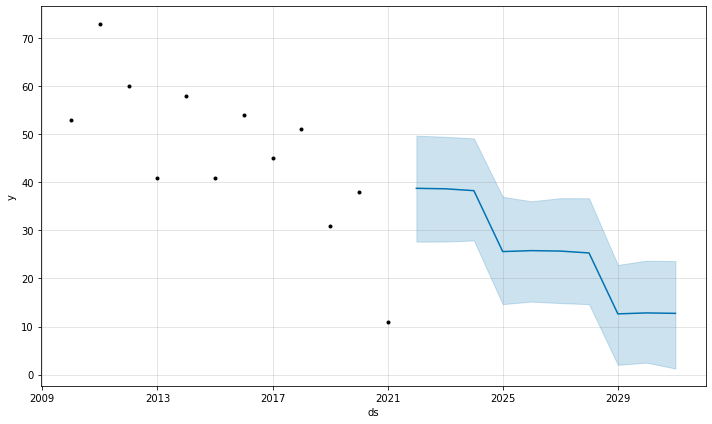

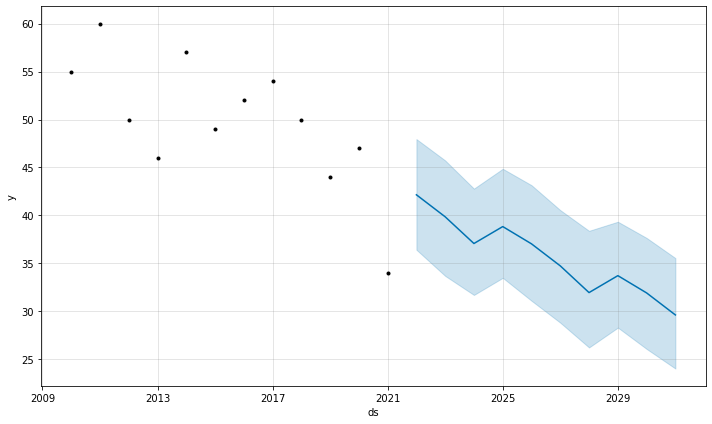

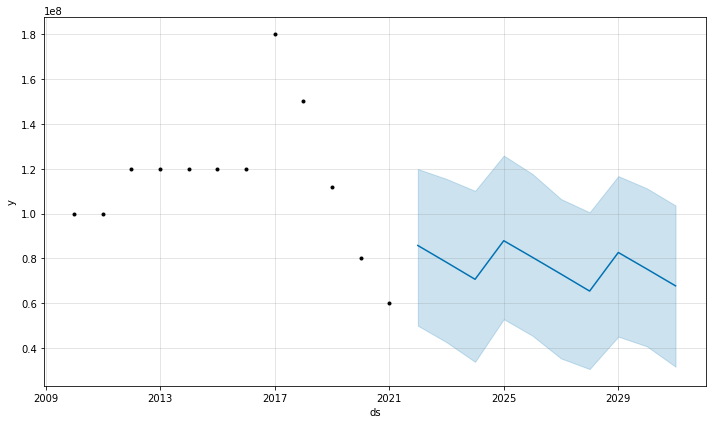

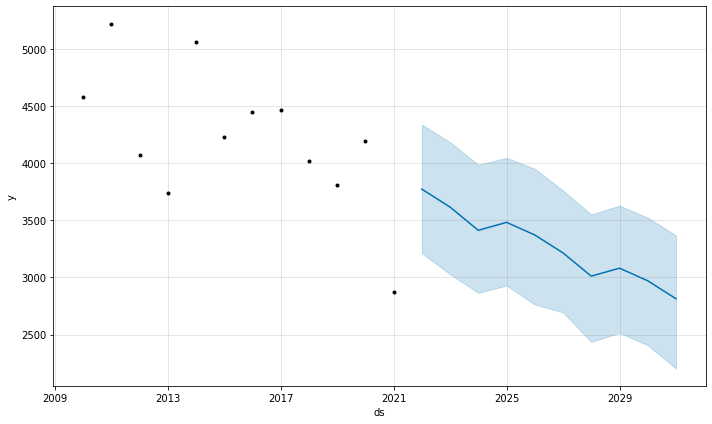

In [31]:
m, forecast = predict_player(df, 10)
plots = m.plot(forecast)

In [27]:
import joblib

In [29]:
joblib.dump(predict_player, "prophet_player.joblib")

['prophet_player.joblib']

In [155]:
import joblib

big_model = joblib.load("model.joblib")

In [151]:
def make_pred(df, column = "value_player"):
    
    model = Prophet()
    model.fit(df.rename(columns={"year": "ds", column:"y"}))
    future = model.make_future_dataframe(5, freq='y', include_history=False)
    result = model.predict(future)
    return result, model

#regressors = ["age", "games_played", "goals", "assists", "minute_played"]

#for regressor in regressors:
#    model.add_regressor(regressor)

In [152]:
future, model = make_pred(df, "goals")
future

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/nix/store/nkk7wmbi9i1cfn57iybrpi8z2kavpc3p-python3-3.8.13-env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:n_changepoints greater than number of observations. Using 8.
/nix/store/nkk7wmbi9i1cfn57iybrpi8z2kavpc3p-python3-3.8.13-env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/nix/store/nkk7wmbi9i1cfn57iybrpi8z2kavpc3p-python3-3.8.13-env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: Future


Initial log joint probability = -64.681
Iteration  1. Log joint probability =    6.30507. Improved by 70.9861.
Iteration  2. Log joint probability =    13.8755. Improved by 7.57042.
Iteration  3. Log joint probability =    19.0747. Improved by 5.1992.
Iteration  4. Log joint probability =    19.4413. Improved by 0.366652.
Iteration  5. Log joint probability =     19.559. Improved by 0.117626.
Iteration  6. Log joint probability =    19.5639. Improved by 0.004907.
Iteration  7. Log joint probability =    19.5649. Improved by 0.00104846.
Iteration  8. Log joint probability =    19.5697. Improved by 0.00477559.
Iteration  9. Log joint probability =    19.5699. Improved by 0.000193493.
Iteration 10. Log joint probability =    19.5703. Improved by 0.000452369.
Iteration 11. Log joint probability =    19.5704. Improved by 5.55451e-05.
Iteration 12. Log joint probability =    19.5715. Improved by 0.0010626.
Iteration 13. Log joint probability =    19.5719. Improved by 0.000425195.
Iteration 

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-12-31,-48.149582,27.142212,49.600818,-48.149582,-48.149582,86.899442,86.899442,86.899442,86.899442,86.899442,86.899442,0.0,0.0,0.0,38.749860
1,2022-12-31,-51.385992,27.726703,49.394096,-51.385992,-51.385992,90.042437,90.042437,90.042437,90.042437,90.042437,90.042437,0.0,0.0,0.0,38.656445
2,2023-12-31,-54.622402,27.095932,49.882513,-54.622402,-54.622401,92.889138,92.889138,92.889138,92.889138,92.889138,92.889138,0.0,0.0,0.0,38.266736
3,2024-12-31,-57.867678,14.662790,36.087472,-57.867679,-57.867678,83.463428,83.463428,83.463428,83.463428,83.463428,83.463428,0.0,0.0,0.0,25.595750
4,2025-12-31,-61.104088,14.099513,37.018966,-61.104088,-61.104087,86.899442,86.899442,86.899442,86.899442,86.899442,86.899442,0.0,0.0,0.0,25.795354


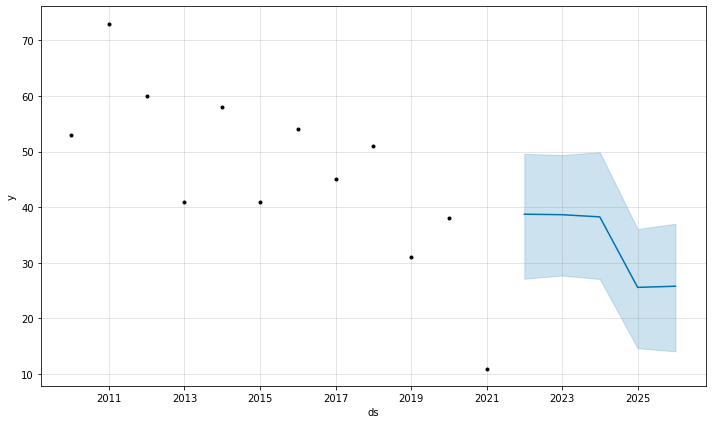

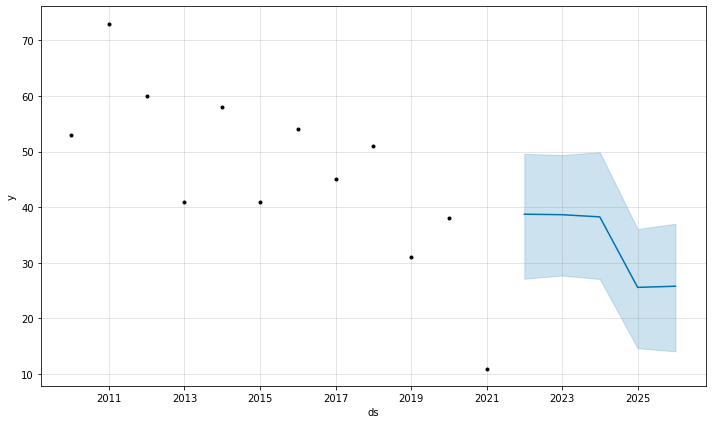

In [153]:
model.plot(future)

In [133]:
result = model.predict(future)

/nix/store/nkk7wmbi9i1cfn57iybrpi8z2kavpc3p-python3-3.8.13-env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/nix/store/nkk7wmbi9i1cfn57iybrpi8z2kavpc3p-python3-3.8.13-env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [163]:
df.iloc[-1].year.year

2021

In [167]:
def getPlayerData(df, name: str, n = 5):
    df = df[df.name_player == name]
    
    last = df.iloc[-1] # get last year data
    
    future = [last] * n
    
    year_last = last.year.year
    
    for var in ["age", "games_played", "goals", "assists", "minute_played"]:
        result, _ = make_pred(df, column=var)
        future[var] = result.yhat
        
    return future
        
    
#X = pd.DataFrame.from_dict({k: [v] for k, v in player_data.items()})

In [168]:
getPlayerData(df, "Lionel Messi")

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/nix/store/nkk7wmbi9i1cfn57iybrpi8z2kavpc3p-python3-3.8.13-env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:n_changepoints greater than number of observations. Using 8.



Initial log joint probability = -64.3308
Iteration  1. Log joint probability =    45.2976. Improved by 109.628.
Iteration  2. Log joint probability =    54.1938. Improved by 8.89617.
Iteration  3. Log joint probability =    61.5105. Improved by 7.3167.
Iteration  4. Log joint probability =    67.5832. Improved by 6.07272.
Iteration  5. Log joint probability =    74.6196. Improved by 7.03643.
Iteration  6. Log joint probability =    80.0115. Improved by 5.39186.
Iteration  7. Log joint probability =    82.9281. Improved by 2.9166.
Iteration  8. Log joint probability =    90.8957. Improved by 7.96763.
Iteration  9. Log joint probability =    101.856. Improved by 10.9603.
Iteration 10. Log joint probability =    109.841. Improved by 7.98505.
Iteration 11. Log joint probability =    112.563. Improved by 2.72148.
Iteration 12. Log joint probability =    129.381. Improved by 16.8183.
Iteration 13. Log joint probability =    130.878. Improved by 1.49685.
Iteration 14. Log joint probability =

SystemError: <class 'stanfit4anon_model_dfdaf2b8ece8a02eb11f050ec701c0ec_7137271070646445093.PyStanHolder'> returned a result with an error set

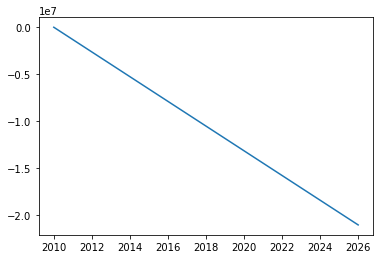

In [95]:
plt.plot(result.ds, result.trend)

In [96]:
import matplotlib.pyplot as plt

(0.0, 187595946.28540552)

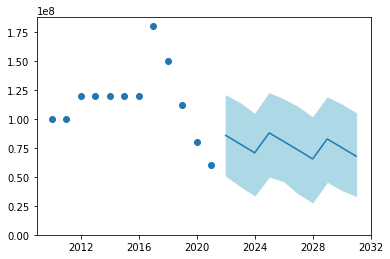

In [137]:
plt.plot(result.ds, result.yhat)

plt.fill_between(result.ds,result.yhat_upper, result.yhat_lower,interpolate=True,color='lightblue')
plt.scatter(df.ds, df.y)
plt.ylim(0, None)

In [115]:
result.yearly_lower

0     1.251902e+08
1     1.194655e+08
2     1.136168e+08
3     1.307838e+08
4     1.251902e+08
5     1.194655e+08
6     1.136168e+08
7     1.307838e+08
8     1.251902e+08
9     1.194655e+08
10    1.136168e+08
11    1.307838e+08
12    1.015760e+08
13    9.539879e+07
14    8.912704e+07
15    1.076512e+08
16    1.015760e+08
17    9.539879e+07
18    8.912704e+07
19    1.076512e+08
20    1.015760e+08
21    9.539879e+07
Name: yearly_lower, dtype: float64

In [117]:
result

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-01,-2.689935e+04,8.934453e+07,1.599908e+08,-2.689935e+04,-2.689935e+04,1.251902e+08,1.251902e+08,1.251902e+08,1.251902e+08,1.251902e+08,1.251902e+08,0.0,0.0,0.0,1.251633e+08
1,2011-01-01,-1.339176e+06,8.265767e+07,1.537366e+08,-1.339176e+06,-1.339176e+06,1.194655e+08,1.194655e+08,1.194655e+08,1.194655e+08,1.194655e+08,1.194655e+08,0.0,0.0,0.0,1.181264e+08
2,2012-01-01,-2.651453e+06,7.102960e+07,1.463275e+08,-2.651453e+06,-2.651453e+06,1.136168e+08,1.136168e+08,1.136168e+08,1.136168e+08,1.136168e+08,1.136168e+08,0.0,0.0,0.0,1.109654e+08
3,2013-01-01,-3.967326e+06,9.163993e+07,1.611935e+08,-3.967326e+06,-3.967326e+06,1.307838e+08,1.307838e+08,1.307838e+08,1.307838e+08,1.307838e+08,1.307838e+08,0.0,0.0,0.0,1.268165e+08
4,2014-01-01,-5.279603e+06,8.228999e+07,1.557824e+08,-5.279603e+06,-5.279603e+06,1.251902e+08,1.251902e+08,1.251902e+08,1.251902e+08,1.251902e+08,1.251902e+08,0.0,0.0,0.0,1.199106e+08
5,2015-01-01,-6.591880e+06,7.645124e+07,1.493569e+08,-6.591880e+06,-6.591880e+06,1.194655e+08,1.194655e+08,1.194655e+08,1.194655e+08,1.194655e+08,1.194655e+08,0.0,0.0,0.0,1.128737e+08
6,2016-01-01,-7.904157e+06,7.046807e+07,1.434335e+08,-7.904157e+06,-7.904157e+06,1.136168e+08,1.136168e+08,1.136168e+08,1.136168e+08,1.136168e+08,1.136168e+08,0.0,0.0,0.0,1.057127e+08
7,2017-01-01,-9.220029e+06,8.574095e+07,1.583702e+08,-9.220029e+06,-9.220029e+06,1.307838e+08,1.307838e+08,1.307838e+08,1.307838e+08,1.307838e+08,1.307838e+08,0.0,0.0,0.0,1.215638e+08
8,2018-01-01,-1.053231e+07,7.816777e+07,1.520733e+08,-1.053231e+07,-1.053231e+07,1.251902e+08,1.251902e+08,1.251902e+08,1.251902e+08,1.251902e+08,1.251902e+08,0.0,0.0,0.0,1.146579e+08
9,2019-01-01,-1.184458e+07,7.374600e+07,1.432647e+08,-1.184458e+07,-1.184458e+07,1.194655e+08,1.194655e+08,1.194655e+08,1.194655e+08,1.194655e+08,1.194655e+08,0.0,0.0,0.0,1.076210e+08


In [87]:
X

,name_player,age,role,squad_name,games_played,goals,assists,minute_played,championship,goals_conceded,clean_sheets
year,,,,,,,,,,,
2010,Lionel Messi,23,Right Winger,FC Barcelona,55,53.0,27.0,4579,primera-division,NaN,NaN
2011,Lionel Messi,24,Right Winger,FC Barcelona,60,73.0,32.0,5221,primera-division,NaN,NaN
2012,Lionel Messi,25,Right Winger,FC Barcelona,50,60.0,17.0,4070,primera-division,NaN,NaN
2013,Lionel Messi,26,Right Winger,FC Barcelona,46,41.0,14.0,3742,primera-division,NaN,NaN
2014,Lionel Messi,27,Right Winger,FC Barcelona,57,58.0,31.0,5060,primera-division,NaN,NaN
2015,Lionel Messi,28,Right Winger,FC Barcelona,49,41.0,24.0,4229,primera-division,NaN,NaN
2016,Lionel Messi,29,Right Winger,FC Barcelona,52,54.0,20.0,4452,primera-division,NaN,NaN
2017,Lionel Messi,30,Right Winger,FC Barcelona,54,45.0,20.0,4468,primera-division,NaN,NaN
2018,Lionel Messi,31,Right Winger,FC Barcelona,50,51.0,22.0,4023,primera-division,NaN,NaN


In [136]:
result.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [40]:
pl = plots["games_played"]

In [37]:
import matplotlib.pyplot as plt

In [50]:
pl.set_label(x="hi")

TypeError: set_label() got an unexpected keyword argument 'x'

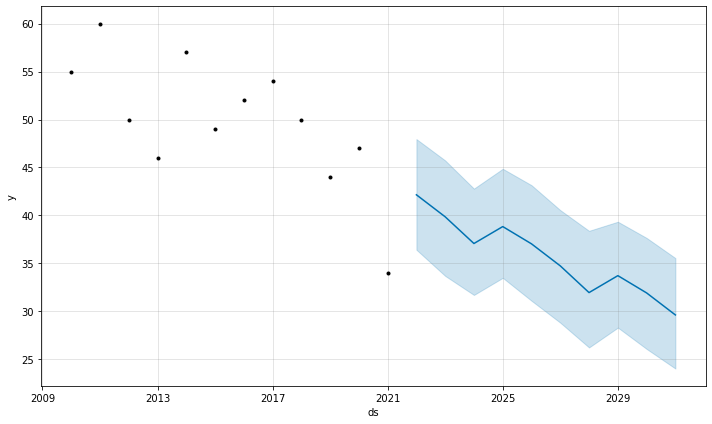

In [49]:
pl

In [ ]:
pl.set_l